In [0]:
import numpy as np
import pandas as pd
import string
import nltk

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [0]:
chr_to_idx = {j:i for i,j in enumerate(string.ascii_lowercase)}
idx_to_chr = {i:j for i,j in enumerate(string.ascii_lowercase)}

chr_to_idx['\n'] = 26
idx_to_chr[26] = '\n'

vocab_size = len(chr_to_idx)

### String Functions

In [0]:
def split_word(word): 
  return [i for i in word]
  
def punc_check(x):
  return True not in ([i in [i for i in string.punctuation] for i in x])
  
def letter_check(x):
  return False in ([i not in [i for i in string.ascii_lowercase] for i in x])
  
def number_check(x):
  return False not in ([i not in [str(i) for i in [*range(0, 9)]] for i in x])
  
def token_idx(tokens):
  return [chr_to_idx[i] for i in tokens]
  
def end_pad(token, max_length):
  return token + [chr_to_idx['\n']] * (max_length - len(token))  

In [0]:
# def one_hot(A, classes):

#   _, m, T = A.shape
#   n_C = classes

#   A_one_hot = np.zeros((n_C, m, T))

#   for t in range(T):
#     for i, j in enumerate(np.squeeze(A[:, :, t])):
#       A_one_hot[j, i, t] = 1

#   return A_one_hot

In [0]:
def one_hot(A, classes, num_examples):
    return np.eye(classes)[np.array(A).reshape(-1)].reshape(num_examples, -1, classes)

### Data Cleansing

In [0]:
us_name = pd.read_csv('/content/drive/My Drive/Colab Notebooks/names_us.csv')
us_names = us_name.copy()

In [0]:
us_names.drop(columns = ['year', 'percent', 'sex'], inplace = True)

In [0]:
us_names.dropna(inplace = True)

In [0]:
ind_name = pd.read_csv('/content/drive/My Drive/Colab Notebooks/names.csv', header = None)
ind_names = ind_name.copy()

In [0]:
ind_names.drop(columns=1, inplace = True)
ind_names.columns = ['name']

In [0]:
ind_names.dropna(inplace = True)

In [0]:
data = pd.concat([us_names, ind_names]).reset_index().drop('index', axis = 1)

In [51]:
data.head()

,name
0,John
1,William
2,James
3,Charles
4,George


In [0]:
data['name'] = data['name'].apply(lambda x: x.split(' ')[0].strip())

In [0]:
data['name'] = data['name'].apply(lambda x: x.lower())

In [0]:
data = pd.Series(data['name'].unique())

In [55]:
data.head()

0       john
1    william
2      james
3    charles
4     george
dtype: object

In [56]:
print(data[-100:].values)

['kushmi' 'sanjogta' 'geetika' 'sahnara' 'prasanta' 'ajmit' 'nazima'
 'mankuri' 'rennu' 'samiya' 'soba' 'लाली' 'savreen' 'areen' 'hemlat'
 'sunhara' 'neeta@narayani' 'सुगना' 'pholwati' 'rekhwan' 'maigo' 'satvida'
 'nachita' 'umme' 'nathiya' 'awshin' 'channu' 'नैना' 'sushri' 'mema'
 'sahgufta' 'fahira' 'rubbina' 'farmeena' 'dur' 'raju,' 'tabbusum' 'maaya'
 'tinvkal' 'taki' 'bhawar' 'sosari' 'pataso' 'ekata' 'hajari' 'susmita'
 'santra' 'smh.sugana' 'farana' 'joyate' 'lashma' 'marjana' 'shymo'
 'maadhuri' 'sukmani' 'fulo' 'smt.lokesh' 'pawni' 'munnia' 'lta' 'najara'
 'dilish' 'kesavi' 'ashmin' 'sipra' 'alis' 'shilap' 'smt.nisha' 'husiya'
 'शाहीन' 'nafeesa' 'sibanaz' 'monam' 'meela' 'premwati@radha' 'hongsi'
 'khush' 'bali' 'roopali' 'revakshi' 'nikhad' 'sahima' 'minaxni'
 'foolwati' 'alhamdi' 'sagiran' 'gajla' 'shvani' 'rubiya' 'lavali' 'jugan'
 'subhagi' 'munia' 'vidyawati' 'abhaki' 'injum' 'kaarti' 'vaijanti'
 'narayani' 'nayna']


In [0]:
data = data[data.apply(lambda x: letter_check(x))]

In [0]:
data = data[data.apply(lambda x: punc_check(x))]

In [0]:
data = data.apply(lambda x: split_word(x.lower()))

In [77]:
data.shape

(13036,)

In [0]:
data = data[data.apply(lambda x: letter_check(x))]

In [0]:
data = data[data.apply(lambda x: number_check(x))]

In [80]:
data.shape

(13036,)

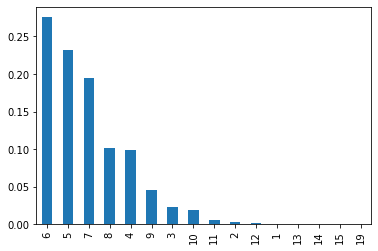

In [81]:
data.apply(lambda x: len(x)).value_counts(normalize = True).plot.bar()

In [82]:
data = data[data.apply(lambda x: len(x) > 4 and len(x) < 8)]

# data = data[data.apply(lambda x: len(x) == 6)]
data.shape

(9162,)

In [0]:
data = data.reset_index().drop(['index'], axis = 1)

In [0]:
data.columns = ['name']

In [0]:
data = pd.Series(data['name'])

In [89]:
data.explode().unique()

array(['w', 'i', 'l', 'a', 'm', 'j', 'e', 's', 'c', 'h', 'r', 'g', 'o',
       'f', 'n', 'k', 'p', 't', 'y', 'b', 'd', 'u', 'v', 'z', 'x', 'q'],
      dtype=object)

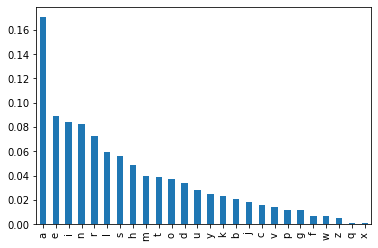

In [90]:
data.explode().value_counts(normalize = True).plot.bar()

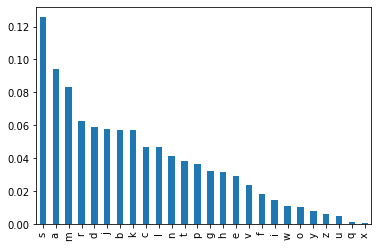

In [91]:
data.apply(lambda x: x[0]).value_counts(normalize = True).plot.bar()

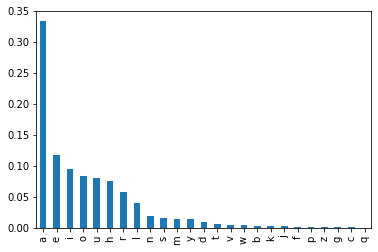

In [92]:
data.apply(lambda x: x[1]).value_counts(normalize = True).plot.bar()

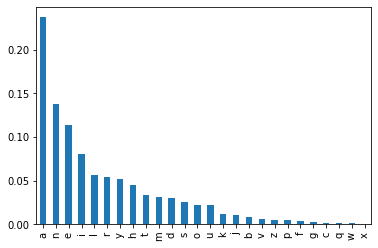

In [93]:
data.apply(lambda x: x[-1]).value_counts(normalize = True).plot.bar()

In [0]:
data = data.apply(lambda x: token_idx(x))

In [0]:
max_length = max([len(i) for i in data])
data = data.apply(lambda x: end_pad(x, max_length))

In [0]:
data = data.sample(frac = 1)

In [97]:
data_subset = data#[0:100]
m = len(data_subset)
print("Number of Training Examples:", m)

Number of Training Examples: 9162


In [0]:
# X_tokens = np.array(data_subset.values.tolist()).reshape(1, m, -1)
# Y_tokens = np.array(data_subset.apply(lambda x: x[1:]).apply(lambda x: x + [chr_to_idx['\n']]).values.tolist()).reshape(1, m, -1)

# X = one_hot(X_tokens, vocab_size)
# Y = one_hot(Y_tokens, vocab_size)

In [0]:
X_pre = np.array(data_subset.values.tolist()).reshape(m, max_length, 1)

In [0]:
X = one_hot(X_pre, vocab_size, m)

In [0]:
Y_pre = np.array(data_subset.apply(lambda x: x[1:]).apply(lambda x: x + [chr_to_idx['\n']]).values.tolist()).reshape(m, max_length, 1)

In [0]:
Y = one_hot(Y_pre, vocab_size, m)

In [0]:
Y = np.transpose(Y, axes = [1, 0, 2])

In [104]:
print(X.shape)
print(Y.shape)

(9162, 7, 27)
(7, 9162, 27)


## Model Building

In [105]:
import tensorflow as tf
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K

Using TensorFlow backend.


In [0]:
from keras.layers import CuDNNLSTM

In [107]:
print(X.shape)
print(Y.shape)

(9162, 7, 27)
(7, 9162, 27)


In [0]:
n_a = 512

Tx = Ty = max_length
n_values = vocab_size

In [0]:
reshapor_1 = Reshape((1, n_values))    

reshapor_2 = Reshape((n_a, 1))   

#LSTM_cell = LSTM(n_a, return_state = True) 

LSTM_cell_1 = CuDNNLSTM(n_a, return_state = True)

LSTM_cell_2 = CuDNNLSTM(n_a, return_state = True)

densor = Dense(n_values, activation='softmax')

In [0]:
def name_model(Tx, n_a, n_values):

    X = Input(shape = (Tx, n_values))

    a_10 = Input(shape=(n_a,), name='a_10')
    c_10 = Input(shape=(n_a,), name='c_10')

    # a_20 = Input(shape=(n_a,), name='a_20')
    # c_20 = Input(shape=(n_a,), name='c_20')

    a_1 = a_10
    c_1 = c_10
    # a_2 = a_20
    # c_2 = c_20

    outputs = []

    for t in range(Tx):

      x = Lambda(lambda z: z[:, t, :])(X)

      x_1 = reshapor_1(x)

      a_1, _, c_1 = LSTM_cell_1(inputs = x_1, initial_state = [a_1, c_1])
      out = densor(a_1)

    #   x_2 = reshapor_2(a_1)
    #   a_2, _, c_2 = LSTM_cell_2(inputs = x_2, initial_state = [a_2, c_2])
    #   out = densor(a_2)

      outputs.append(out)

    # model = Model(inputs = [X, a_10, c_10, a_20, c_20], outputs = outputs)
    model = Model(inputs = [X, a_10, c_10], outputs = outputs)

    return model

In [0]:
del(model)
del(name_model)

In [0]:
model = name_model(Tx, n_a, n_values)

In [155]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 7, 27)        0                                            
__________________________________________________________________________________________________
lambda_29 (Lambda)              (None, 27)           0           input_5[0][0]                    
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 1, 27)        0           lambda_29[0][0]                  
                                                                 lambda_30[0][0]                  
                                                                 lambda_31[0][0]                  
                                                                 lambda_32[0][0]            

In [0]:
opt = Adam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999, decay = 0.01)

model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
a_10 = np.zeros((m, n_a))
c_10 = np.zeros((m, n_a))

a_20 = np.zeros((m, n_a))
c_20 = np.zeros((m, n_a))

#### Training

In [158]:
model.fit([X, a_10, c_10], list(Y), epochs = 100)
# model.save('Namer_v1.h5')

Epoch 1/100
9162/9162 [==============================] - 10s 1ms/step - loss: 11.1083 - dense_3_loss: 0.0050 - dense_3_acc: 0.3670 - dense_3_acc_1: 0.2450 - dense_3_acc_2: 0.2775 - dense_3_acc_3: 0.3319 - dense_3_acc_4: 0.4489 - dense_3_acc_5: 0.7612 - dense_3_acc_6: 0.9997
Epoch 2/100
9162/9162 [==============================] - 8s 905us/step - loss: 10.2982 - dense_3_loss: 0.0011 - dense_3_acc: 0.3687 - dense_3_acc_1: 0.2591 - dense_3_acc_2: 0.3176 - dense_3_acc_3: 0.3877 - dense_3_acc_4: 0.5134 - dense_3_acc_5: 0.8019 - dense_3_acc_6: 0.9999
Epoch 3/100
9162/9162 [==============================] - 9s 955us/step - loss: 9.8435 - dense_3_loss: 8.7516e-04 - dense_3_acc: 0.3725 - dense_3_acc_1: 0.2678 - dense_3_acc_2: 0.3329 - dense_3_acc_3: 0.4176 - dense_3_acc_4: 0.5600 - dense_3_acc_5: 0.8374 - dense_3_acc_6: 1.0000
Epoch 4/100
9162/9162 [==============================] - 8s 919us/step - loss: 9.5093 - dense_3_loss: 5.5342e-04 - dense_3_acc: 0.3735 - dense_3_acc_1: 0.2734 - dense_3_a

In [0]:
model.fit([X, a_10, c_10, a_20, c_20], list(Y), epochs = 1500)
model.save('Namer_v2.h5')

#### Next Steps

In [0]:
def keras_one_hot(x, classes = 27):

    x = K.argmax(x)
    x = tf.one_hot(x, classes) 
    x = RepeatVector(1)(x)
    
    return x

In [0]:
def name_inference_model(LSTM_cell, densor, n_values, n_a, Ty):

    x0 = Input(shape=(1, n_values))
    a0 = Input(shape=(n_a,), name='a0')
    c0 = Input(shape=(n_a,), name='c0')
    a = a0
    c = c0
    x = x0

    outputs = []
    
    for t in range(Ty):
        
        a, _, c = LSTM_cell(x, initial_state=[a, c])
        
        out = densor(a)

        outputs.append(out)
        
        x = Lambda(keras_one_hot)(out)
        
    inference_model = Model(inputs = [x0, a0, c0], outputs = outputs)
    
    return inference_model

In [0]:
def predict_and_sample(inference_model, num_classes, x_initializer, a_initializer, c_initializer):

    pred = inference_model.predict([x_initializer,a_initializer,c_initializer])
    indices = np.argmax(pred, axis = -1)
    results = to_categorical(indices, num_classes)
    
    return pred, results, indices

In [0]:
inference_model = name_inference_model(LSTM_cell_1, densor, n_values, n_a, Ty)

In [0]:
#inference_model.summary()

In [0]:
# x_initializer = np.zeros((1, 1, vocab_size))
x_initializer = np.random.randn(1, 1, vocab_size)
# x_initializer[:, :, 0] = 1

a_initializer = np.zeros((1, n_a))
c_initializer = np.zeros((1, n_a))

In [0]:
pred, results, indices = predict_and_sample(inference_model, n_values, x_initializer, a_initializer, c_initializer)

In [163]:
for i in indices:
    print(idx_to_chr[int(i)], end = '')

do






In [164]:
for v in range(vocab_size):
    print(v)
    x_initializer = np.zeros((1, 1, vocab_size))
    x_initializer[:, :, v] = 1
    _, _, indices = predict_and_sample(inference_model, n_values, x_initializer, a_initializer, c_initializer)
    for i in indices:
        print(idx_to_chr[int(i)], end = '')
    #print('\n')

0
lisha

1
alaram
2
handa

3
elia


4
lisa


5
arhana
6
ulshad
7
ardes

8
shant

9
anelle
10
aris


11
akhan

12
arian

13
andini
14
rvil


15
arveen
16
uint


17
ambir

18
antosh
19
amika

20
rman


21
ines


22
illia

23
imena

24
ashin

25
aiden

26









In [0]:
# import pandas as pd

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dinos.txt', sep = '\n', header = None)

# df = pd.Series(np.squeeze(df.values))
# df = df.apply(lambda x: split(x.lower()))
# df = df[df.apply(lambda x: len(x) > 7 and len(x) < 14)]
# #df = df[df.apply(lambda x: len(x) == 9)]
# df = df.apply(lambda x: token_idx(x))

# max_length = max([len(i) for i in df])
# df = df.apply(lambda x: end_pad(x, max_length))

# df = df.sample(frac = 1)
# data_subset = df

# m = len(data_subset)

# X_tokens = np.array(data_subset.values.tolist()).reshape(1, m, -1)
# Y_tokens = np.array(data_subset.apply(lambda x: x[1:]).apply(lambda x: x + [chr_to_idx['\n']]).values.tolist()).reshape(1, m, -1)

# X = one_hot(X_tokens, vocab_size)
# Y = one_hot(Y_tokens, vocab_size)

# parameters = model(X, Y, idx_to_chr, chr_to_idx, num_iterations = 35000, n_a = 50, sample_size = 7, vocab_size = vocab_size)